In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_data=pd.read_csv('QVI_data.csv')
df_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [3]:
df_data.shape

(264834, 12)

In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


In [5]:
df_data.describe()

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,2.648340e+05,264834.000000,2.648340e+05,264834.000000,264834.000000,264834.000000,264834.000000
mean,1.355488e+05,135.079423,1.351576e+05,56.583554,1.905813,7.299346,182.425512
std,8.057990e+04,76.784063,7.813292e+04,32.826444,0.343436,2.527241,64.325148
min,1.000000e+03,1.000000,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,7.002100e+04,70.000000,6.760050e+04,28.000000,2.000000,5.400000,150.000000
50%,1.303570e+05,130.000000,1.351365e+05,56.000000,2.000000,7.400000,170.000000
75%,2.030940e+05,203.000000,2.026998e+05,85.000000,2.000000,9.200000,175.000000
max,2.373711e+06,272.000000,2.415841e+06,114.000000,5.000000,29.500000,380.000000


In [7]:
df_data["DATE"] = pd.to_datetime(df_data["DATE"], format="%Y-%m-%d")

# Add a new 'MONTH_ID' column in the data with the format yyyymm
df_data["MONTH_ID"] = df_data["DATE"].dt.strftime("%Y%m").astype("int")
df_data["MONTH_ID"].head()

0    201810
1    201809
2    201903
3    201903
4    201811
Name: MONTH_ID, dtype: int32

In [8]:
# Monthly total sales
M_TOT_SALES = df_data.groupby(["STORE_NBR","MONTH_ID"])["TOT_SALES"].sum()

# Monthly customer counts
M_CUS_COUNTS = df_data.groupby(["STORE_NBR","MONTH_ID"])["LYLTY_CARD_NBR"].nunique()

# Monthly transactions per customer
M_TXN_CUS = df_data.groupby(["STORE_NBR","MONTH_ID"])["TXN_ID"].nunique()/M_CUS_COUNTS

# Monthly chips per customer
M_CHIP_CUS = df_data.groupby(["STORE_NBR","MONTH_ID"])["PROD_QTY"].sum()/M_CUS_COUNTS

# Monthly average price per unit
M_AVG_PRICE_CHIP = M_TOT_SALES/df_data.groupby(["STORE_NBR","MONTH_ID"])["PROD_QTY"].sum()

# Combining metrics together
measureOverTime = pd.concat([M_TOT_SALES, M_CUS_COUNTS, M_TXN_CUS, M_CHIP_CUS, M_AVG_PRICE_CHIP],axis=1)                                 
measureOverTime.columns = ["totSales", "nCustomers", "nTxnPerCust", "nChipsPerTxn", "avgPricePerUnit"]
measureOverTime = measureOverTime.reset_index()
measureOverTime

,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.265306,3.337097
1,1,201808,176.1,42,1.023810,1.285714,3.261111
2,1,201809,278.8,59,1.050847,1.271186,3.717333
3,1,201810,188.1,44,1.022727,1.318182,3.243103
4,1,201811,192.6,46,1.021739,1.239130,3.378947
...,...,...,...,...,...,...,...
3164,272,201902,395.5,45,1.066667,2.022222,4.346154
3165,272,201903,442.3,50,1.060000,2.020000,4.379208
3166,272,201904,445.1,54,1.018519,1.944444,4.239048
3167,272,201905,314.6,34,1.176471,2.088235,4.430986


In [10]:

# Stores with full observation periods(12 month)
obs_counts = measureOverTime["STORE_NBR"].value_counts()
full_idx = obs_counts[obs_counts == 12].index
storesWithFullObs = measureOverTime[measureOverTime["STORE_NBR"].isin(full_idx)]

# Filter to the pre-trial period (201807 - 201901)
preTrialMeasures = storesWithFullObs[storesWithFullObs["MONTH_ID"] < 201902]
preTrialMeasures.head(8)

,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,201807,206.9,49,1.061224,1.265306,3.337097
1,1,201808,176.1,42,1.023810,1.285714,3.261111
2,1,201809,278.8,59,1.050847,1.271186,3.717333
3,1,201810,188.1,44,1.022727,1.318182,3.243103
4,1,201811,192.6,46,1.021739,1.239130,3.378947
5,1,201812,189.6,42,1.119048,1.357143,3.326316
6,1,201901,154.8,35,1.028571,1.200000,3.685714
12,2,201807,150.8,39,1.051282,1.179487,3.278261


In [11]:
def CorrelationCalculation(inputTable, metricCol, storeComparison):
    
    """'inputTable'      as a metric table with potential comparison stores 
       'metricCol'       as the store metric used to calculate correlation on 
       'storeComparison' as the store number of the trial store."""
    
    control_all = inputTable.loc[~inputTable["STORE_NBR"].isin([77,86,88])]
    trial = inputTable.loc[inputTable["STORE_NBR"] == storeComparison][metricCol].reset_index()
    calcCorrTable = pd.DataFrame(columns = ["Control_Store", "Trial_Store", "Corr"])
    
    for i in control_all["STORE_NBR"].unique():
        control = control_all[control_all["STORE_NBR"]==i][metricCol].reset_index()              
        correlation = control.corrwith(trial,axis=0)[1]
        calcCorrTable_i = pd.DataFrame({"Control_Store":i,"Trial_Store":storeComparison,"Corr":[correlation]}) 
        calcCorrTable = pd.concat([calcCorrTable, calcCorrTable_i])
     
    return calcCorrTable


#### Analysing Store 77

In [12]:
scalingControlSales_77 = (preTrialMeasures[preTrialMeasures["STORE_NBR"] == 77]["totSales"].sum()) / (preTrialMeasures[preTrialMeasures["STORE_NBR"] == 233]["totSales"].sum())
scalingControlSales_77

1.023617303289553

In [13]:
# Apply the scaling factor
scaledControlSales_77 = measureOverTime[measureOverTime["STORE_NBR"]== 233]
scaledControlSales_77["controlSales"] = scaledControlSales_77["totSales"] * scalingControlSales_77
scaledControlSales_77

<ipython-input-13-0328a3e94862>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  scaledControlSales_77["controlSales"] = scaledControlSales_77["totSales"] * scalingControlSales_77


,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit,controlSales
2699,233,201807,290.7,51,1.058824,1.725490,3.303409,297.565550
2700,233,201808,285.9,48,1.041667,1.666667,3.573750,292.652187
2701,233,201809,228.6,42,1.071429,1.666667,3.265714,233.998916
2702,233,201810,185.7,35,1.028571,1.600000,3.316071,190.085733
2703,233,201811,211.6,40,1.025000,1.550000,3.412903,216.597421
2704,233,201812,279.8,47,1.063830,1.595745,3.730667,286.408121
2705,233,201901,177.5,35,1.000000,1.342857,3.776596,181.692071
2706,233,201902,244.0,45,1.044444,1.555556,3.485714,249.762622
2707,233,201903,199.1,40,1.025000,1.475000,3.374576,203.802205
2708,233,201904,158.6,30,1.066667,1.533333,3.447826,162.345704


In [14]:
# Calculate the percentage difference between scaled control sales and trial sales
trialSales_77 = measureOverTime[measureOverTime["STORE_NBR"]== 77].reset_index(drop=True)
scaledControlSales_77 = scaledControlSales_77.reset_index(drop=True)
percentageDiff_77_s = pd.concat([trialSales_77["MONTH_ID"],trialSales_77["totSales"],scaledControlSales_77["controlSales"]],axis=1)
percentageDiff_77_s.columns=["MONTH_ID","trialSales","controlSales"]
percentageDiff_77_s["percentageDiff"]= (abs(percentageDiff_77_s["trialSales"]-percentageDiff_77_s["controlSales"]))/percentageDiff_77_s["controlSales"]
percentageDiff_77_s

,MONTH_ID,trialSales,controlSales,percentageDiff
0,201807,296.8,297.565550,0.002573
1,201808,255.5,292.652187,0.126950
2,201809,225.2,233.998916,0.037602
3,201810,204.5,190.085733,0.075830
4,201811,245.3,216.597421,0.132516
5,201812,267.3,286.408121,0.066716
6,201901,204.4,181.692071,0.124980
7,201902,235.0,249.762622,0.059107
8,201903,278.5,203.802205,0.366521
9,201904,263.5,162.345704,0.623080


In [15]:
# Note that there are 8 months in the pre-trial period, hence 8 - 1 = 7 degrees of freedom
dof = 7

# standard deviation of percentage difference in pre-trail period
stdDev_77_s = percentageDiff_77_s[percentageDiff_77_s["MONTH_ID"]<201902]["percentageDiff"].std()
stdDev_77_s

0.049940762641425544

In [16]:
# Calculate the t-values for the trial months. 
percentageDiff_77_s["tValue"] = (percentageDiff_77_s["percentageDiff"]-0)/stdDev_77_s
percentageDiff_77_s

,MONTH_ID,trialSales,controlSales,percentageDiff,tValue
0,201807,296.8,297.565550,0.002573,0.051515
1,201808,255.5,292.652187,0.126950,2.542011
2,201809,225.2,233.998916,0.037602,0.752940
3,201810,204.5,190.085733,0.075830,1.518406
4,201811,245.3,216.597421,0.132516,2.653459
5,201812,267.3,286.408121,0.066716,1.335911
6,201901,204.4,181.692071,0.124980,2.502571
7,201902,235.0,249.762622,0.059107,1.183534
8,201903,278.5,203.802205,0.366521,7.339116
9,201904,263.5,162.345704,0.623080,12.476373


In [17]:
# Critical value under 95% confidence & degree of freedom = 7
from scipy.stats import t
t.ppf(0.975,dof) # two-tail

2.3646242510102993

In [18]:
# Create new variables Store_type, totSales and TransactionMonth in the data table 
# Create a new column "Store_Type"
measureOverTimeSales_77 = measureOverTime
pastSales_77 = measureOverTimeSales_77
trial_store = 77
control_store = 233
store_type = []
for i in pastSales_77["STORE_NBR"]:
    if i == trial_store:
        store_type.append("Trial")
    elif i == control_store:
        store_type.append("Control")
    else:
        store_type.append("Other Stores")
pastSales_77["Store_type"] = store_type

# Create a new column 'TransactionMonth'
pastSales_77["TransactionMonth"] = pd.to_datetime(pastSales_77["MONTH_ID"], format = "%Y%m")

# select Trial and control store
pastSales_77 = pastSales_77.loc[pastSales_77["Store_type"].isin(["Control","Trial"])]
pastSales_77 = pastSales_77.loc[:,["TransactionMonth", "Store_type","totSales"]]
pastSales_77

,TransactionMonth,Store_type,totSales
880,2018-07-01,Trial,296.8
881,2018-08-01,Trial,255.5
882,2018-09-01,Trial,225.2
883,2018-10-01,Trial,204.5
884,2018-11-01,Trial,245.3
885,2018-12-01,Trial,267.3
886,2019-01-01,Trial,204.4
887,2019-02-01,Trial,235.0
888,2019-03-01,Trial,278.5
889,2019-04-01,Trial,263.5


In [19]:
# Control store 95th percentile
pastSales_Controls95_77 = pastSales_77[pastSales_77["Store_type"] == "Control"]
pastSales_Controls95_77["totSales"] = pastSales_Controls95_77["totSales"] * (1+(stdDev_77_s*2))
pastSales_Controls95_77["Store_type"] = "Control 95th % confidence interval"
pastSales_Controls95_77 = pastSales_Controls95_77.loc[:,["TransactionMonth", "Store_type","totSales"]]
pastSales_Controls95_77.head()

<ipython-input-19-582ab7b2b1b6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls95_77["totSales"] = pastSales_Controls95_77["totSales"] * (1+(stdDev_77_s*2))
<ipython-input-19-582ab7b2b1b6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls95_77["Store_type"] = "Control 95th % confidence interval"


,TransactionMonth,Store_type,totSales
2699,2018-07-01,Control 95th % confidence interval,319.735559
2700,2018-08-01,Control 95th % confidence interval,314.456128
2701,2018-09-01,Control 95th % confidence interval,251.432917
2702,2018-10-01,Control 95th % confidence interval,204.247999
2703,2018-11-01,Control 95th % confidence interval,232.734931


In [20]:
# Control store 5th percentile
pastSales_Controls5_77 = pastSales_77[pastSales_77["Store_type"] == "Control"]
pastSales_Controls5_77["totSales"] = pastSales_Controls95_77["totSales"] * (1-(stdDev_77_s*2))
pastSales_Controls5_77["Store_type"] = "Control 5th % confidence interval"
pastSales_Controls5_77 = pastSales_Controls5_77.loc[:,["TransactionMonth", "Store_type","totSales"]]
pastSales_Controls5_77.head()

<ipython-input-20-d0273a508d10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls5_77["totSales"] = pastSales_Controls95_77["totSales"] * (1-(stdDev_77_s*2))
<ipython-input-20-d0273a508d10>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pastSales_Controls5_77["Store_type"] = "Control 5th % confidence interval"


,TransactionMonth,Store_type,totSales
2699,2018-07-01,Control 5th % confidence interval,287.799884
2700,2018-08-01,Control 5th % confidence interval,283.047770
2701,2018-09-01,Control 5th % confidence interval,226.319413
2702,2018-10-01,Control 5th % confidence interval,183.847398
2703,2018-11-01,Control 5th % confidence interval,209.489011


In [24]:
# Merge 3 tables above together
trialAssessment_77_s = pd.concat([pastSales_77, pastSales_Controls95_77, pastSales_Controls5_77])
trialAssessment_77_s.head() 

,TransactionMonth,Store_type,totSales
880,2018-07-01,Trial,296.8
881,2018-08-01,Trial,255.5
882,2018-09-01,Trial,225.2
883,2018-10-01,Trial,204.5
884,2018-11-01,Trial,245.3


In [25]:
trialAssessment_77_s.tail()

,TransactionMonth,Store_type,totSales
2706,2019-02-01,Control 5th % confidence interval,241.565778
2707,2019-03-01,Control 5th % confidence interval,197.113715
2708,2019-04-01,Control 5th % confidence interval,157.017756
2709,2019-05-01,Control 5th % confidence interval,340.964156
2710,2019-06-01,Control 5th % confidence interval,218.795233


In [26]:
# Plotting these in one nice graph
# Dataset for barplot
bar_77_s = trialAssessment_77_s
bar_77_s["TransactionMonth"] = bar_77_s["TransactionMonth"].dt.strftime("%Y-%m").astype("str")
bar_77_s = bar_77_s.set_index("TransactionMonth")
bar_77_s = bar_77_s.iloc[:24,:]
bar_77_s

,Store_type,totSales
TransactionMonth,,
2018-07,Trial,296.8
2018-08,Trial,255.5
2018-09,Trial,225.2
2018-10,Trial,204.5
2018-11,Trial,245.3
2018-12,Trial,267.3
2019-01,Trial,204.4
2019-02,Trial,235.0
2019-03,Trial,278.5


In [27]:
# Dataset for lineplot
line_77_s = trialAssessment_77_s.set_index(["TransactionMonth","Store_type"])["totSales"].unstack()
line_77_s = line_77_s.iloc[:,[1,2]]
line_77_s

Store_type,Control 5th % confidence interval,Control 95th % confidence interval
TransactionMonth,,
2018-07,287.799884,319.735559
2018-08,283.047770,314.456128
2018-09,226.319413,251.432917
2018-10,183.847398,204.247999
2018-11,209.489011,232.734931
2018-12,277.008626,307.746851
2019-01,175.729203,195.228971
2019-02,241.565778,268.371092
2019-03,197.113715,218.986412


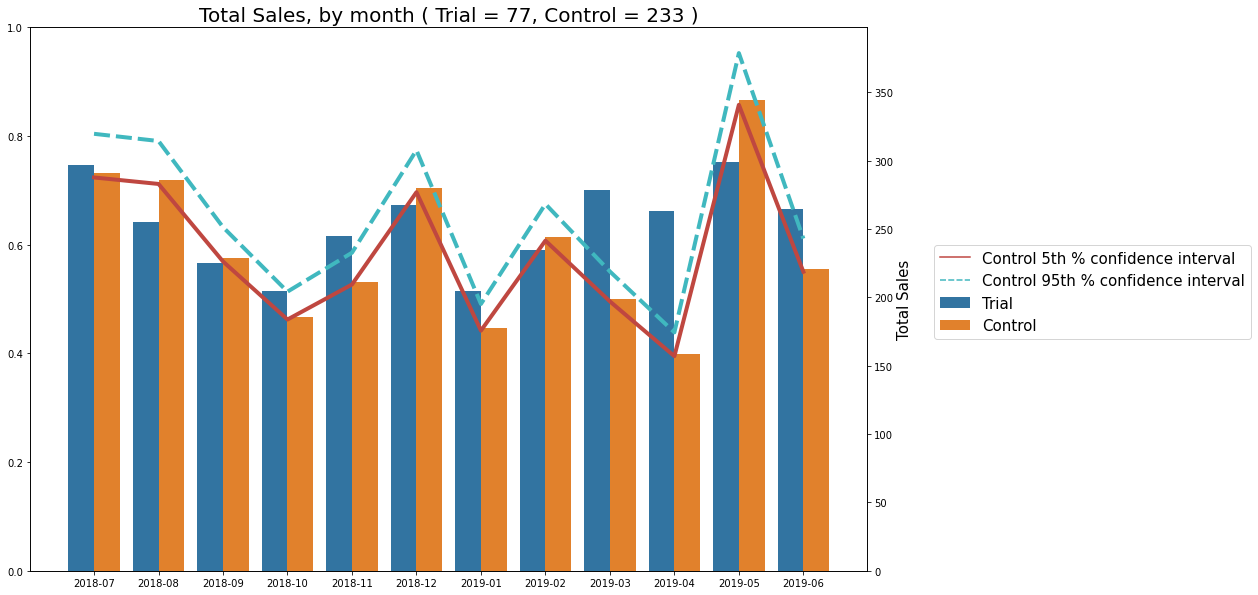

In [32]:

fig, ax1 = plt.subplots(1, 1, figsize=(15,10))
ax2 = ax1.twinx()
ax1 = sns.barplot(x=bar_77_s.index, y=bar_77_s["totSales"], hue=bar_77_s["Store_type"], data=bar_77_s,
                )
ax2 = sns.lineplot(data=line_77_s, linewidth=4, palette=sns.hls_palette(2, l=.5, s=.5))

plt.title("Total Sales, by month ( Trial = 77, Control = 233 )",fontsize=20)
plt.xlabel("Month of Operation",fontsize=15)
plt.ylabel("Total Sales", fontsize=15)
plt.legend(fontsize=15, bbox_to_anchor=(1.08,0.6),borderaxespad = 0.)